<a href="https://colab.research.google.com/github/aadi-kanwar/Neural-Network-Deep-Learning/blob/main/Exp_7_Implement_an_Image_Classifier_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install required Libraries

In [4]:
!pip install tensorflow==2.17.0

In [2]:
!pip install tensorflow matplotlib

## Import Required Dependencies

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

## Load the dataset

In [6]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Normalize the pixel values to between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

## Creating the Model

In [8]:
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolution Layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatter the output before feeding to the dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

## Compile the model

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Fit the Model

In [10]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 91ms/step - accuracy: 0.3223 - loss: 1.8592 - val_accuracy: 0.5153 - val_loss: 1.3530
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.5295 - loss: 1.3236 - val_accuracy: 0.5872 - val_loss: 1.1860
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.6025 - loss: 1.1430 - val_accuracy: 0.6341 - val_loss: 1.0589
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 90ms/step - accuracy: 0.6458 - loss: 1.0132 - val_accuracy: 0.6404 - val_loss: 1.0420
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.6801 - loss: 0.9212 - val_accuracy: 0.6729 - val_loss: 0.9388
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.7005 - loss: 0.8634 - val_accuracy: 0.6777 - val_loss: 0.9220
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.7195 - loss: 0.8085 - val_accuracy: 0.6765 - val_loss: 0.9457
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.7351 - loss: 0.7660 - 

## Calculate Accuracy

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7060 - loss: 0.8948
Test accuracy: 0.7009999752044678


## Visual Representation

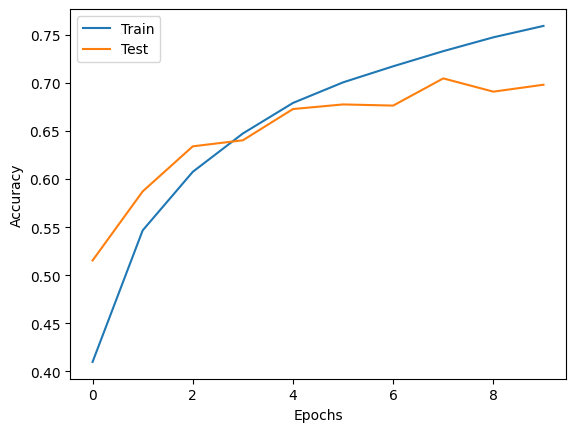

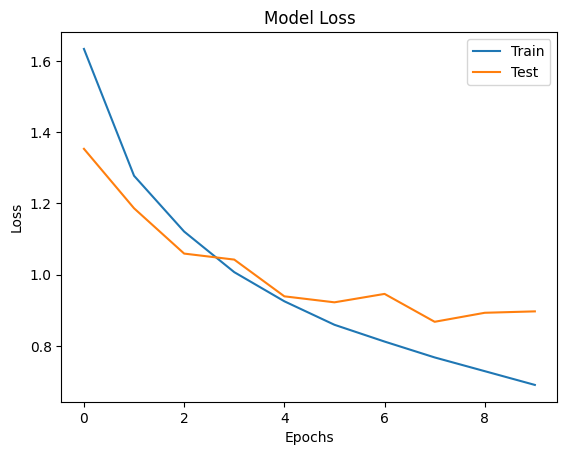

In [25]:
# Plot training and validation accuracy values
import matplotlib.pyplot as plt
# plt.figure(figsize = (12,6))
#plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & Validation loss values
#plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Making Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


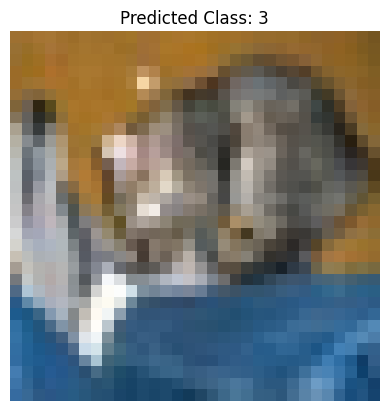

In [26]:
# Make Predictions on test data
predictions = model.predict(x_test)

# Display the first image and its predicted class
plt.imshow(x_test[0])
plt.title(f'Predicted Class: {predictions[0].argmax()}')
plt.axis('off')
plt.show()